In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('../EDA/data.csv')
Y = pd.read_csv('../EDA/y.csv')

In [4]:
dataset = dataset.merge(Y, how='left', on=["year","country"])

In [8]:
dataset = dataset.dropna(axis=0, how='all')

In [14]:
cut = pd.cut(dataset["GDP-PerCapitainterPolation"], 11)

In [16]:
dataset["cut"] = cut

In [24]:
checkingMatrix = dataset.iloc[:,-10:]

[NaN, (-131.524, 17249.708], (17249.708, 34441.827], (34441.827, 51633.945], (51633.945, 68826.064], ..., (103210.302, 120402.421], (120402.421, 137594.539], (154786.658, 171978.777], (137594.539, 154786.658], (171978.777, 189170.896]]
Length: 12
Categories (11, interval[float64]): [(-131.524, 17249.708] < (17249.708, 34441.827] < (34441.827, 51633.945] < (51633.945, 68826.064] ... (120402.421, 137594.539] < (137594.539, 154786.658] < (154786.658, 171978.777] < (171978.777, 189170.896]]

In [35]:
unique =checkingMatrix["cut"].unique()
checkingMatrix[checkingMatrix["cut"]==unique[2]]["v2x_libdem"]

3625       NaN
3896       NaN
4024     0.049
4167       NaN
4295     0.047
         ...  
16689      NaN
16705      NaN
16706      NaN
16712      NaN
16734      NaN
Name: v2x_libdem, Length: 929, dtype: float64

c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\numpy\core\_methods.py:170: RuntimeW

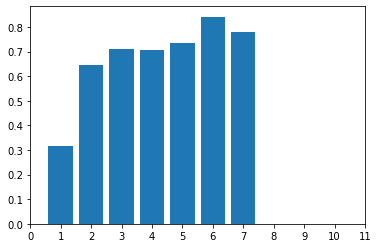

In [36]:
import scipy.stats as scStat

setToCompare = "cut"
unique =checkingMatrix["cut"].unique()
clusters = len(unique)
democracyScore = "v2x_libdem"

bars = [np.mean(checkingMatrix[checkingMatrix[setToCompare]==unique[i]][democracyScore].dropna().values) for i in range(clusters)]
plt.bar(range(clusters),bars)
plt.xticks(range(clusters))
plt.show()


# # zeroArray = np.zeros((clusters+1,clusters+1))
# zeroArray = [[0]*(clusters+1)]*(clusters+1)

# barlett = [checkingMatrix[checkingMatrix[setToCompare]==i][democracyScore].dropna().values for i in range(clusters)]
# barlettTest = scStat.levene(*barlett)

# print(barlettTest)

# for i in range(clusters):
#     # print(len(checkingMatrix[checkingMatrix[setToCompare]==i]["v2x_partipdem"]))
#     compareSet = checkingMatrix[checkingMatrix[setToCompare]==i][democracyScore].dropna().values
#     if len(compareSet) > 8:
#         normality_v2X_PartiDem = scStat.normaltest(compareSet)
#         print(normality_v2X_PartiDem, barlettTest)
#         for z in range(clusters):
#             tTest = 0
#             if i != z:
#                 compareSet2 = checkingMatrix[checkingMatrix[setToCompare]==z][democracyScore].dropna().values
#                 levene = scStat.levene(compareSet,compareSet2)
#                 print(levene)

#                 if len(compareSet2) > 8:
#                     tTest = scStat.ttest_ind(compareSet,compareSet2)
#                     zeroArray[i][z] = (tTest[1], levene[1])
#                     print("Compare "+ democracyScore +", of cluster", i, " against:", z, ":", tTest)
#                     print("")
#             else:
#                 zeroArray[i][z] = 1
#     print("")

# zeroArray